### Import independencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import random, seed
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf

## Part I: Data overview and preprocessing


In [2]:
# Loading our dataset 
df = pd.read_csv('weatherAUS.csv')

# We need to process the date format to be able to use it in future algorithms
# Date time format
df["Date"] = pd.to_datetime(df["Date"])       # Change to datetime type so we can then divide into year , month and day
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
#df.info()                       # New variables which are year month and day, so we need to eliminate the date variable
df.drop("Date",axis=1,inplace=True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [3]:
np.sum(df['RainTomorrow'].isna())

3267

### Functions


### Encoding possibility of rain 
Yes = 1
No = 0

In [4]:
def rain_encoding(df):
    ''' This function is used to encode label to binary numbers
    Yes => 1 and No => 0'''

    df['RainToday'] = df['RainToday'].replace('Yes',1)   
    df['RainToday'] = df['RainToday'].replace('No',0) 
    
    df['RainTomorrow'] = df['RainTomorrow'].replace('Yes',1)   
    df['RainTomorrow'] = df['RainTomorrow'].replace('No',0) 
    return df
    

In [5]:
df = rain_encoding(df)

### Process string values

In [6]:
string_values_col = [i for i in df.columns if df[i].dtype=='O']
df[string_values_col].head()

,Location,WindGustDir,WindDir9am,WindDir3pm
0,Albury,W,W,WNW
1,Albury,WNW,NNW,WSW
2,Albury,WSW,W,WSW
3,Albury,NE,SE,E
4,Albury,W,ENE,NW


### For string values encoding, I would like to try either integer encoding (each value == 1 integer) or one-hot encoding (to vector of binary)

### integer encoding

In [7]:
def integer_encoding(string_values_col):
    for i in string_values_col:
        array = (df[i][df[i].isna() == False]).unique()
        for j in range(len(array)):
            df[i] = df[i].replace( array[j],j)
    return df

In [8]:
drop_string_df = integer_encoding(string_values_col)
drop_string_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,0,13.4,22.9,0.6,NaN,NaN,0.0,44.0,0.0,0.0,...,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,2008,12,1
1,0,7.4,25.1,0.0,NaN,NaN,1.0,44.0,1.0,1.0,...,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,2008,12,2
2,0,12.9,25.7,0.0,NaN,NaN,2.0,46.0,0.0,1.0,...,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,2008,12,3
3,0,9.2,28.0,0.0,NaN,NaN,3.0,24.0,2.0,2.0,...,1012.8,NaN,NaN,18.1,26.5,0.0,0.0,2008,12,4
4,0,17.5,32.3,1.0,NaN,NaN,0.0,41.0,3.0,3.0,...,1006.0,7.0,8.0,17.8,29.7,0.0,0.0,2008,12,5


In [9]:
df_train, df_test = train_test_split(drop_string_df,test_size=0.2, random_state=0)
df_train

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
22926,7,18.8,23.7,0.2,5.0,7.3,13.0,52.0,11.0,6.0,...,1013.9,5.0,7.0,21.4,22.2,0.0,1.0,2014,3,12
80735,26,9.3,24.0,0.2,1.6,10.9,3.0,48.0,1.0,14.0,...,1014.6,3.0,5.0,14.3,23.2,0.0,0.0,2016,10,6
121764,40,10.9,22.2,1.4,1.2,9.6,7.0,26.0,NaN,10.0,...,1014.9,1.0,2.0,16.6,21.5,1.0,0.0,2011,8,31
139821,46,19.3,29.9,0.0,9.2,11.0,13.0,43.0,11.0,2.0,...,1012.1,1.0,1.0,23.2,29.1,0.0,0.0,2010,6,11
1867,0,15.7,17.6,12.4,NaN,NaN,14.0,20.0,11.0,2.0,...,1010.5,8.0,8.0,16.5,17.3,1.0,1.0,2014,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41993,13,17.8,38.1,0.0,26.0,NaN,3.0,39.0,15.0,2.0,...,1009.7,1.0,1.0,25.4,36.8,0.0,0.0,2015,12,20
97639,32,12.5,27.3,0.0,NaN,10.0,0.0,30.0,NaN,0.0,...,1017.3,NaN,NaN,17.0,26.5,0.0,0.0,2012,3,11
95939,31,17.0,29.8,0.0,5.6,NaN,8.0,22.0,13.0,7.0,...,1016.1,NaN,NaN,24.1,29.0,0.0,0.0,2016,6,10
117952,39,11.9,22.0,3.8,6.2,7.7,15.0,35.0,5.0,0.0,...,1018.5,7.0,6.0,17.1,19.7,1.0,0.0,2009,11,20


In [10]:
def handle_invalid_values(df_input, invalid_rate=0.5):
    
    df = df_input.copy()
    
    df_train_, df_test_ = train_test_split(df,test_size=0.2, random_state=0)
    df_train = df_train_.copy()
    df_test = df_test_.copy()
    ''' The function take in a string of file name and return a desired treated dataframe '''
    N_events = len(df.index)
    
    ''' The number of events in the dataset'''
    column_list = df.columns.tolist()
    
    ''' Get the column names as a list'''
    idx_drop = 0
    
    for col in column_list:
        n_invalids = np.sum(df[col].isna())
        ''' Count the number of invalid values in each column'''
        
        if n_invalids/N_events > invalid_rate:
            
            df_train = df_train.drop(columns=col)
            df_test = df_test.drop(columns=col)
            ''' if the rate of invalid values over total is greater than the given invalid rate,
            we will drop the whole column'''
            idx_drop += 1

        elif n_invalids != 0: 
            
            mean_col = df_train[col][df_train[col].isna() == False ].mean()
            df_train[col] = df_train[col].fillna(mean_col)
            df_test[col] = df_test[col].fillna(mean_col)
            ''' For the other numerical columns, replace the invalid values by the mean value of all valid ones*
            in that column'''
    return df_train, df_test, idx_drop

In [11]:
frac = np.arange(0,0.9,0.1)
num_col = []
for i in frac:
    _,_, buff = handle_invalid_values(drop_string_df,i)
    num_col.append(buff)

[21, 6, 4, 4, 3, 0, 0, 0, 0]

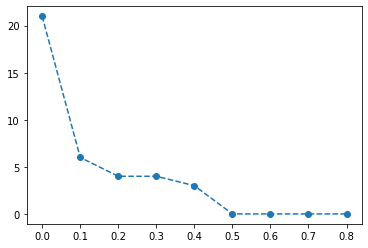

In [12]:
plt.plot(frac, num_col, 'o--')
num_col

Then i would choose different slpitting rate of 0, 0.1, 0.2, 0.4 and 0.5

## Model

In [13]:
from tensorflow.keras.layers import Dense , Dropout, Conv1D, Reshape, BatchNormalization as BN
import tensorflow as tf

def train_model(model, name, train_data, val_data, batch_size=100, epochs=15):
    def lr_scheduler(epochs):
        if epochs < 10:
            return 1e-3
        else:
            if epochs < 20:
                return 1e-4
            else:
                return 1e-5

    filepath =  './models/' + name + '.hdf5'
    saving = tf.keras.callbacks.ModelCheckpoint(filepath=filepath,
                                                monitor='val_accuracy',
                                                save_best_only=True,
                                                 save_weights_only=True)
    history = model.fit(
    train_data[0], train_data[1],
    epochs=epochs,
    batch_size=batch_size,
    validation_data=val_data,
    verbose=2,
    callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_scheduler), saving]
    )   

    return None


def fully_dense_model(num_features, train_data, val_data, 
                      units=32, activation='tanh', rate=0.1):
    inputs = tf.keras.layers.Input(shape=(num_features,))
    x = Dense(4*units, activation=activation)(inputs)
    x = BN()(x)
    x = Dropout(rate)(x)
    x = Dense(2*units, activation=activation)(x)
    x = BN()(x)
    x = Dropout(rate)(x)
    x = Dense(units, activation=activation)(x)
    x = BN()(x)
    x = Dropout(rate)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    
    name = 'fully_dense_num-features=' + str(num_features)
    file_path = './models/' + name + '.hdf5'
    train_model(model, name, train_data, val_data)
    model.load_weights(file_path)
    
    return model

def convolution_model(num_features, train_data, val_data, 
                      units=128, channels=16, kernel_size=5, 
                      activation='tanh', rate=0.1):
    inputs = tf.keras.layers.Input(shape=(num_features,))
    x = Dense(units, activation=activation)(inputs)
    x = Reshape((units, 1))(x)
    x = BN()(x)
    x = Conv1D(2*channels, kernel_size, activation=activation)(x)
    x = BN()(x)
    x = Dropout(rate)(x)
    x = Conv1D(channels, kernel_size, activation=activation)(x)
    x = BN()(x)
    x = Dropout(rate)(x)
    x = Conv1D(1, kernel_size, activation=activation)(x)
    x = BN()(x)
    x = Dropout(rate)(x)
    x = tf.keras.layers.Flatten()(x)
    outputs = Dense(1, activation='sigmoid')(x)
    
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    
    name = 'convolution_num-features=' + str(num_features)
    file_path = './models/' + name + '.hdf5'
    train_model(model, name, train_data, val_data)
    model.load_weights(file_path)
    
    return model





## Part II: Deep Neural Networks design and training 

Split and standardize data

In [14]:
X = drop_string_df.drop(["RainTomorrow"], axis=1)
y = drop_string_df.RainTomorrow
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [15]:
df_train, df_test, _ = handle_invalid_values(drop_string_df, invalid_rate=0.5)
X_train = df_train.drop(["RainTomorrow"], axis=1)
y_train = df_train.RainTomorrow
X_test = df_test.drop(["RainTomorrow"], axis=1)
y_test = df_test.RainTomorrow

In [16]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)
#X_train = pd.DataFrame(X_train, columns = [columns])
#X_test = pd.DataFrame(X_test, columns = [columns])
#columns = X_train_raw.columns

In [17]:
len(X_train) == len(y_train)

True

In [18]:
num_features = X_train.shape[1]
model = convolution_model(num_features, (X_train,y_train), (X_test, y_test), units=128)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 24)]              0         
                                                                 
 dense (Dense)               (None, 128)               3200      
                                                                 
 reshape (Reshape)           (None, 128, 1)            0         
                                                                 
 batch_normalization (BatchN  (None, 128, 1)           4         
 ormalization)                                                   
                                                                 
 conv1d (Conv1D)             (None, 124, 32)           192       
                                                                 
 batch_normalization_1 (Batc  (None, 124, 32)          128       
 hNormalization)                                             

In [19]:
loss, accuracy = model.evaluate(X_test,y_test)

910/910 [==============================] - 2s 2ms/step - loss: 0.3470 - accuracy: 0.8359


In [20]:
model = fully_dense_model(num_features,  (X_train,y_train), (X_test, y_test), units=32)
loss, accuracy = model.evaluate(X_test,y_test)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 24)]              0         
                                                                 
 dense_2 (Dense)             (None, 128)               3200      
                                                                 
 batch_normalization_4 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_5 (Batc  (None, 64)               256       
 hNormalization)                                           

## Part III: Choosing the best model

In [21]:
best_model= None
best_rate=0
best_architecture = None
best = 0

f= open("results.txt","w+")
f.write('invalid_rate , model , features , accuracy \n' )
for invalid_rate in [0.1,0.2,0.3, 0.4,0.5]:
    
    df_train, df_test, _ = handle_invalid_values(drop_string_df, invalid_rate=0.5)
    X_train = df_train.drop(["RainTomorrow"], axis=1)
    y_train = df_train.RainTomorrow
    X_test = df_test.drop(["RainTomorrow"], axis=1)
    y_test = df_test.RainTomorrow

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train= scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    num_features = X_train.shape[1]
    
    for archi in ['fully_dense','conv']:
        string = None
        if archi == 'fully_dense':
            model = fully_dense_model(num_features, (X_train,y_train), (X_test, y_test), units=32)
            loss, accuracy = model.evaluate(X_test,y_test)
            

        else:
            model = convolution_model(num_features, (X_train,y_train), (X_test, y_test), units=128)
            loss, accuracy = model.evaluate(X_test,y_test)
        string = str(invalid_rate)+' '+ archi+' '+str(num_features)+' '+str(accuracy) +'\n'
        f.write(string)
            
        if best < accuracy:
            best = accuracy
            best_model = model
            best_rate = invalid_rate
            best_architecture = archi
f.close()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 24)]              0         
                                                                 
 dense_6 (Dense)             (None, 128)               3200      
                                                                 
 batch_normalization_7 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_8 (Batc  (None, 64)               256       
 hNormalization)                                           

Epoch 11/15
1164/1164 - 24s - loss: 0.3376 - accuracy: 0.8392 - val_loss: 0.3459 - val_accuracy: 0.8354 - lr: 1.0000e-04 - 24s/epoch - 21ms/step
Epoch 12/15
1164/1164 - 25s - loss: 0.3369 - accuracy: 0.8396 - val_loss: 0.3457 - val_accuracy: 0.8356 - lr: 1.0000e-04 - 25s/epoch - 21ms/step
Epoch 13/15
1164/1164 - 25s - loss: 0.3359 - accuracy: 0.8395 - val_loss: 0.3458 - val_accuracy: 0.8354 - lr: 1.0000e-04 - 25s/epoch - 21ms/step
Epoch 14/15
1164/1164 - 25s - loss: 0.3355 - accuracy: 0.8391 - val_loss: 0.3458 - val_accuracy: 0.8357 - lr: 1.0000e-04 - 25s/epoch - 21ms/step
Epoch 15/15
1164/1164 - 25s - loss: 0.3354 - accuracy: 0.8399 - val_loss: 0.3457 - val_accuracy: 0.8353 - lr: 1.0000e-04 - 25s/epoch - 21ms/step
910/910 [==============================] - 2s 2ms/step - loss: 0.3458 - accuracy: 0.8357
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 

Epoch 5/15
1164/1164 - 25s - loss: 0.3514 - accuracy: 0.8322 - val_loss: 0.3520 - val_accuracy: 0.8326 - lr: 0.0010 - 25s/epoch - 21ms/step
Epoch 6/15
1164/1164 - 25s - loss: 0.3497 - accuracy: 0.8328 - val_loss: 0.3516 - val_accuracy: 0.8325 - lr: 0.0010 - 25s/epoch - 21ms/step
Epoch 7/15
1164/1164 - 25s - loss: 0.3473 - accuracy: 0.8335 - val_loss: 0.3504 - val_accuracy: 0.8330 - lr: 0.0010 - 25s/epoch - 21ms/step
Epoch 8/15
1164/1164 - 25s - loss: 0.3465 - accuracy: 0.8343 - val_loss: 0.3492 - val_accuracy: 0.8337 - lr: 0.0010 - 25s/epoch - 21ms/step
Epoch 9/15
1164/1164 - 24s - loss: 0.3454 - accuracy: 0.8344 - val_loss: 0.3495 - val_accuracy: 0.8341 - lr: 0.0010 - 24s/epoch - 21ms/step
Epoch 10/15
1164/1164 - 25s - loss: 0.3439 - accuracy: 0.8349 - val_loss: 0.3502 - val_accuracy: 0.8334 - lr: 0.0010 - 25s/epoch - 21ms/step
Epoch 11/15
1164/1164 - 25s - loss: 0.3385 - accuracy: 0.8379 - val_loss: 0.3474 - val_accuracy: 0.8345 - lr: 1.0000e-04 - 25s/epoch - 21ms/step
Epoch 12/15
11

Epoch 1/15
1164/1164 - 27s - loss: 0.3915 - accuracy: 0.8124 - val_loss: 0.3654 - val_accuracy: 0.8266 - lr: 0.0010 - 27s/epoch - 23ms/step
Epoch 2/15
1164/1164 - 26s - loss: 0.3648 - accuracy: 0.8264 - val_loss: 0.3600 - val_accuracy: 0.8299 - lr: 0.0010 - 26s/epoch - 22ms/step
Epoch 3/15
1164/1164 - 26s - loss: 0.3587 - accuracy: 0.8297 - val_loss: 0.3557 - val_accuracy: 0.8315 - lr: 0.0010 - 26s/epoch - 22ms/step
Epoch 4/15
1164/1164 - 26s - loss: 0.3555 - accuracy: 0.8309 - val_loss: 0.3562 - val_accuracy: 0.8307 - lr: 0.0010 - 26s/epoch - 22ms/step
Epoch 5/15
1164/1164 - 26s - loss: 0.3522 - accuracy: 0.8316 - val_loss: 0.3520 - val_accuracy: 0.8340 - lr: 0.0010 - 26s/epoch - 22ms/step
Epoch 6/15
1164/1164 - 26s - loss: 0.3500 - accuracy: 0.8329 - val_loss: 0.3505 - val_accuracy: 0.8321 - lr: 0.0010 - 26s/epoch - 22ms/step
Epoch 7/15
1164/1164 - 26s - loss: 0.3484 - accuracy: 0.8338 - val_loss: 0.3524 - val_accuracy: 0.8331 - lr: 0.0010 - 26s/epoch - 22ms/step
Epoch 8/15
1164/1164

Epoch 1/15
1164/1164 - 26s - loss: 0.3908 - accuracy: 0.8128 - val_loss: 0.3647 - val_accuracy: 0.8272 - lr: 0.0010 - 26s/epoch - 22ms/step
Epoch 2/15
1164/1164 - 25s - loss: 0.3638 - accuracy: 0.8264 - val_loss: 0.3598 - val_accuracy: 0.8287 - lr: 0.0010 - 25s/epoch - 22ms/step
Epoch 3/15
1164/1164 - 25s - loss: 0.3588 - accuracy: 0.8295 - val_loss: 0.3565 - val_accuracy: 0.8303 - lr: 0.0010 - 25s/epoch - 22ms/step
Epoch 4/15
1164/1164 - 26s - loss: 0.3544 - accuracy: 0.8304 - val_loss: 0.3547 - val_accuracy: 0.8308 - lr: 0.0010 - 26s/epoch - 22ms/step
Epoch 5/15
1164/1164 - 25s - loss: 0.3525 - accuracy: 0.8321 - val_loss: 0.3532 - val_accuracy: 0.8315 - lr: 0.0010 - 25s/epoch - 22ms/step
Epoch 6/15
1164/1164 - 26s - loss: 0.3497 - accuracy: 0.8328 - val_loss: 0.3518 - val_accuracy: 0.8317 - lr: 0.0010 - 26s/epoch - 22ms/step
Epoch 7/15
1164/1164 - 26s - loss: 0.3484 - accuracy: 0.8340 - val_loss: 0.3513 - val_accuracy: 0.8328 - lr: 0.0010 - 26s/epoch - 22ms/step
Epoch 8/15
1164/1164

Total params: 6,366
Trainable params: 6,266
Non-trainable params: 100
_________________________________________________________________
Epoch 1/15
1164/1164 - 27s - loss: 0.3901 - accuracy: 0.8131 - val_loss: 0.3647 - val_accuracy: 0.8273 - lr: 0.0010 - 27s/epoch - 23ms/step
Epoch 2/15
1164/1164 - 26s - loss: 0.3632 - accuracy: 0.8272 - val_loss: 0.3597 - val_accuracy: 0.8287 - lr: 0.0010 - 26s/epoch - 22ms/step
Epoch 3/15
1164/1164 - 27s - loss: 0.3568 - accuracy: 0.8301 - val_loss: 0.3553 - val_accuracy: 0.8314 - lr: 0.0010 - 27s/epoch - 23ms/step
Epoch 4/15
1164/1164 - 27s - loss: 0.3532 - accuracy: 0.8312 - val_loss: 0.3522 - val_accuracy: 0.8309 - lr: 0.0010 - 27s/epoch - 23ms/step
Epoch 5/15
1164/1164 - 26s - loss: 0.3502 - accuracy: 0.8329 - val_loss: 0.3538 - val_accuracy: 0.8316 - lr: 0.0010 - 26s/epoch - 23ms/step
Epoch 6/15
1164/1164 - 27s - loss: 0.3482 - accuracy: 0.8330 - val_loss: 0.3505 - val_accuracy: 0.8334 - lr: 0.0010 - 27s/epoch - 23ms/step
Epoch 7/15
1164/1164 - 2

In [25]:
print('best model architecture ',best_architecture, 'best rate: ', best_rate, 'best accuracy: ', best)

best model architecture  fully_dense best rate:  0.1 best accuracy:  0.8367592692375183


### 2nd: One - hot encoding

In [22]:
def one_hot_encoding(object_var_list):
    for i in object_var:
        array = np.asarray(df[i])
        array = array.reshape(len(array),1)
        enc = OneHotEncoder(handle_unknown='ignore')
        enc.fit(array)
        buff = enc.transform(array).toarray()
        df[i] = buff[:,0]
    return df

In [23]:
array = np.asarray(df['WindGustDir'])
array = array.reshape(len(array),1)
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(array)
buff = enc.transform(array).toarray()
np.shape(buff)


(145460, 17)

In [24]:
one_hot_encoding(object_var).head()

NameError: name 'object_var' is not defined